In [20]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns

uint8
(500, 500)


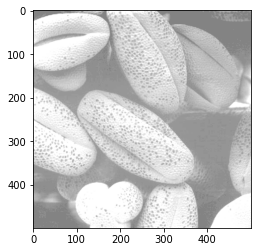

In [21]:
img1= cv2.imread('image1.tif', 0)

print(img1.dtype)

print(img1.shape)

plt.imshow(img1, cmap = 'gray', vmin= 0,vmax=256)

uint8
(500, 500)


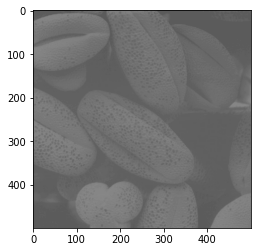

In [22]:
img2= cv2.imread('image2.tif', 0)
print(img2.dtype)

print(img2.shape)

plt.imshow(img2, cmap = 'gray',vmin= 0,vmax=256)

uint8
(500, 500)


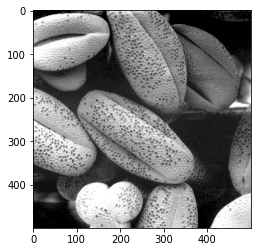

In [23]:
img3= cv2.imread('image3.tif', 0)
print(img3.dtype)

print(img3.shape)

plt.imshow(img3, cmap = 'gray',vmin= 0,vmax=256)

uint8
(500, 500)


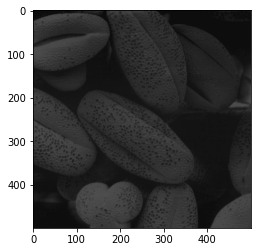

In [24]:
img4= cv2.imread('image4.png', 0)
print(img4.dtype)

print(img4.shape)

plt.imshow(img4, cmap = 'gray',vmin= 0,vmax=256)

In [26]:
def counts(img):
    seq = img.reshape(1,len(img)**2)
    hist = {}
    for i in range(0,256):
        hist[i]=0
    for i in seq[0]:
        hist[i] = hist.get(i, 0) + 1
    return hist   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

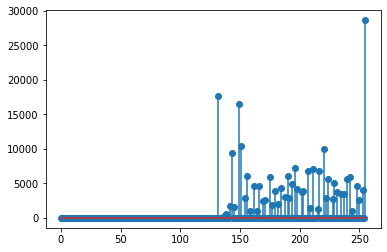

In [27]:
i1 = counts(img1)
plt.stem(i1.keys(),i1.values())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

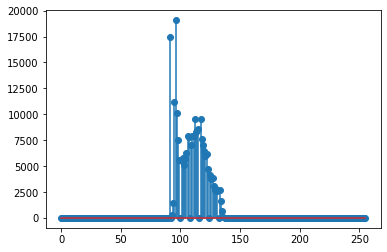

In [29]:
i2 = counts(img2)
plt.stem(i2.keys(),i2.values())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

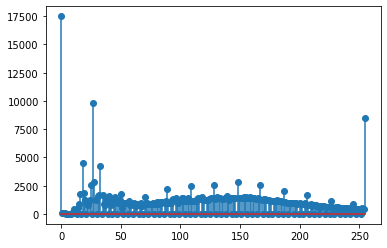

In [30]:
i3 = counts(img3)
plt.stem(i3.keys(),i3.values())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

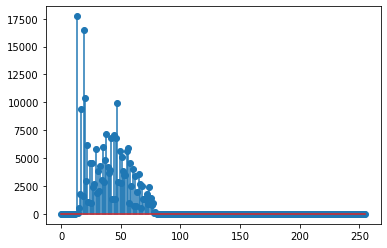

In [31]:
i4 = counts(img4)
plt.stem(i4.keys(),i4.values())

### Histogram equalising


In [68]:
im = img1

im1 = counts(im)

m,n = im.shape

In [52]:
a = m*n


l = []
for i in im1.values():
    l.append(i)


pdf = [i/a for i in l]
pdf = np.array(pdf)


cdf= np.array(np.zeros(len(pdf)))
cdf[0]= pdf[0]
for i in range(1,len(pdf)):
    cdf[i] = cdf[i-1]+pdf[i]


sk = cdf*255
sk = sk.astype(int)


In [53]:
dict = {'nk':im1.keys(),'nk':im1.values(),'pdf':pdf,'cdf':cdf,'sk':sk}

df = pd.DataFrame(dict)

df.tail()

,nk,pdf,cdf,sk
251,0,0.000000,0.869336,221
252,0,0.000000,0.869336,221
253,4007,0.016028,0.885364,225
254,0,0.000000,0.885364,225
255,28659,0.114636,1.000000,255


In [54]:
new_img = im.copy()

In [55]:
for i in range(m):
    for j in range(n):
        val = im[i,j]
        new_val = df.iloc[val].values[3]
        new_img[i,j]=new_val 
      

In [56]:
new_img_counts = counts(new_img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 1.0, 'Histogram plot for the new image')

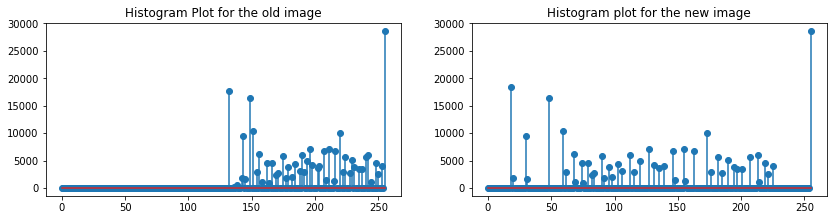

In [103]:
plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
plt.stem(im1.keys(),im1.values())
plt.title('Histogram Plot for the old image')

plt.subplot(2,2,2)
plt.stem(new_img_counts.keys(),new_img_counts.values())
plt.title('Histogram plot for the new image')

Text(0.5, 1.0, 'Equalized Image')

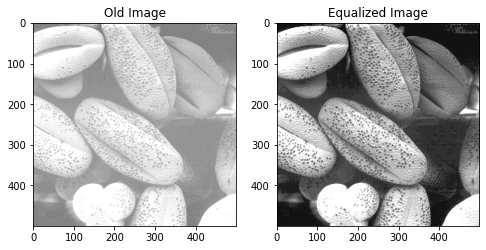

In [105]:
plt.figure(figsize=(8,8))


plt.subplot(1,2,1)
plt.imshow(im,cmap='gray',vmin=0,vmax=255)
plt.title('Old Image')

plt.subplot(1,2,2)
plt.imshow(new_img,cmap='gray',vmin=0,vmax=255)
plt.title('Equalized Image')

In [76]:
b = list(sk)

In [75]:
a = list(im1.keys())

Text(0.5, 1.0, 'Transformation Function')

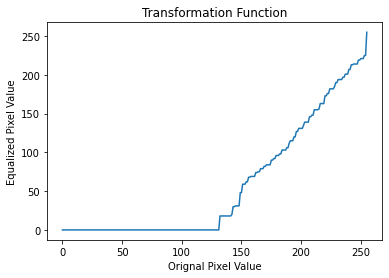

In [77]:
plt.plot(a, b)
plt.xlabel('Orignal Pixel Value')
plt.ylabel('Equalized Pixel Value')
plt.title("Transformation Function")

### Concluson:

I implemented histogram equalization to to enhance contrast of low contrast, dark, or over exposed images. To do this, I calculated pdf, cdf and sk values of an image. The new image is formed by mapping the intensity values of pixels in the old image with their corresponding sk values in the new image. The change in contrast of the image is visible, which is evident form plotting the histograms for both images and the tranfornmation function graph plotted.